### 1. Initial Load & Overview

In [63]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("/workspaces/scm-co-smart-project/data/raw/DataCoSupplyChainDataset.csv", encoding = 'latin-1' )

In [3]:
# Get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
# Create function to rename columns' name
def rename_column(name):
    name = name.lower()
    name = re.sub(r"[^\w]+", "_", name)
    name = name.strip("_")
    return name

In [5]:
# rename columns
df.columns = [rename_column(column) for column in df.columns]

In [6]:
# rename columns: order_date_dateorders --> order_date and shipping_date_dateorders --> shipping_date
df.rename(columns={'order_date_dateorders': 'order_date'}, inplace=True)
df.rename(columns={'shipping_date_dateorders': 'shipping_date'}, inplace=True)

### 2. Data Types & Format

In [7]:
# convert date columns if needed
df['order_date'] = pd.to_datetime(df['order_date'])
df['shipping_date'] = pd.to_datetime(df['shipping_date'])

### 3. Missing Data Analysis

In [8]:
# detect missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_table = pd.DataFrame({
    "missing_values": missing_values,
    "missing_percent": missing_percent
})
missing_table = missing_table[missing_table["missing_values"] > 0]

print(missing_table)

                     missing_values  missing_percent
customer_lname                    8         0.004432
customer_zipcode                  3         0.001662
order_zipcode                155679        86.239676
product_description          180519       100.000000


In [9]:
# for customer_lname and customer_zipcode --> MCAR
df = df.dropna(subset=["customer_lname", "customer_zipcode"])

In [10]:
# for product_description - no values --> drop the whole columns
df = df.drop(['product_description'], axis = 1)

In [14]:
# for order_zipcode - optional data field --> drop the whole columns
df = df.drop(['order_zipcode'], axis = 1)

KeyError: "['order_zipcode'] not found in axis"

#### Drop unnecessary columns

In [15]:
df = df.drop(
    ['customer_email', 'customer_password', 'customer_zipcode',
     'customer_street', 'customer_fname', 'customer_lname',
     'customer_city', 'order_city', 'order_state', 'order_country',
     'product_status', 'product_image'],
    axis=1,
    errors='ignore'
)

### 4. Distribution Analysis

#### 4.1. Customer Info

##### Frequency Distribution Analysis

In [16]:
# Frequency count in customer_state
state_count = df['customer_state'].value_counts()
state_percent = (state_count / len(df)) * 100
state_table = pd.DataFrame({
    "state_count": state_count,
    "state_percent": state_percent
})

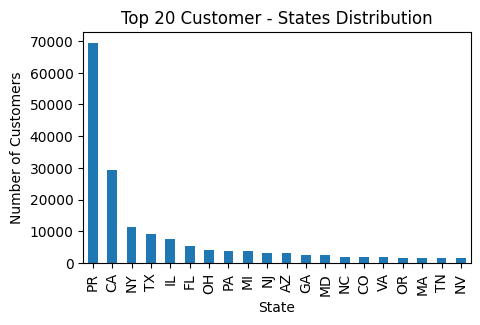

In [17]:
# Bar chart for Customer - States Distribution
plt.figure(figsize=(5,3))
state_count.head(20).plot(kind='bar')
plt.title("Top 20 Customer - States Distribution")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

#### 4.2. Order Info

##### Frequency Distribution Analysis

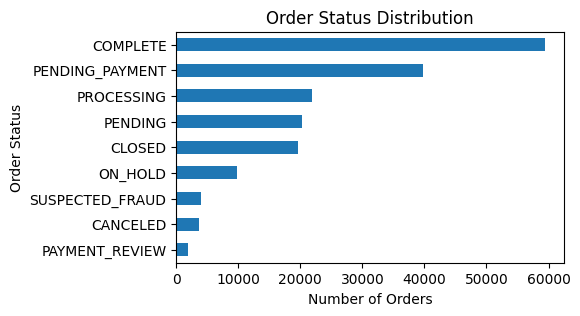

In [18]:
# Order related columns analysis

# order_status
df['order_status'].value_counts()
order_status_count = df['order_status'].value_counts()

# bar chart for Order Status Distribution
plt.figure(figsize=(5,3))
order_status_count.plot(kind='barh')
plt.title("Order Status Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Order Status")
plt.gca().invert_yaxis()
plt.show()

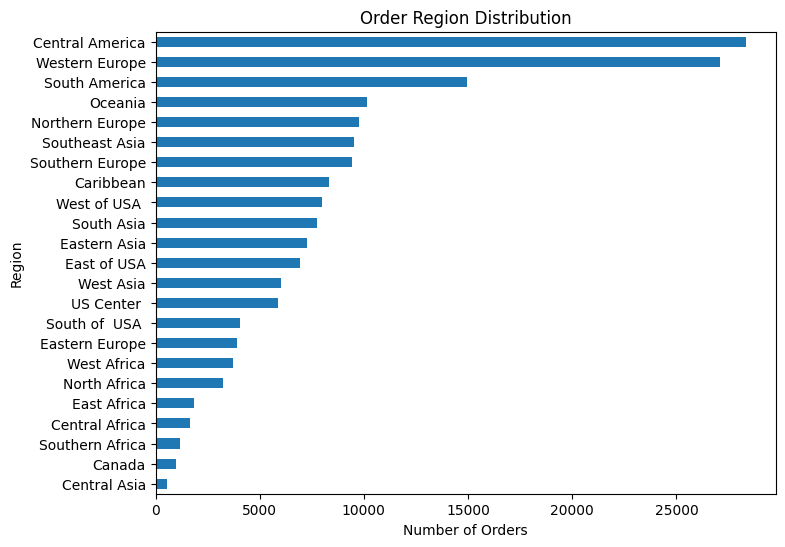

In [19]:
# order_region 
df['order_region'].value_counts()
region_count = df['order_region'].value_counts()

# bar chart for Order Region Distribution
plt.figure(figsize=(8,6))
region_count.plot(kind='barh')
plt.title("Order Region Distribution")
plt.xlabel("Number of Orders")
plt.ylabel("Region")
plt.gca().invert_yaxis()  # region lớn nhất lên trên
plt.show()

##### Datetime Analysis

In [20]:
# create new year, quarter, month, day_name, time columns
df['order_year'] = df['order_date'].dt.year
df['order_quarter'] = df['order_date'].dt.quarter
df['order_month'] = df['order_date'].dt.month
df['order_day_name'] = df['order_date'].dt.day_name()
df['order_hour'] = df['order_date'].dt.hour

In [21]:
# frequency count in order_year --> the dataset is from 2015 - 2018
df['order_year'].value_counts()

order_year
2015    62650
2016    62550
2017    53186
2018     2122
Name: count, dtype: int64

In [22]:
# as 2018 order amount is less than previous year --> check --> 2018 Jan only 
df.loc[df['order_year'] == 2018, 'order_month'].value_counts()

order_month
1    2122
Name: count, dtype: int64

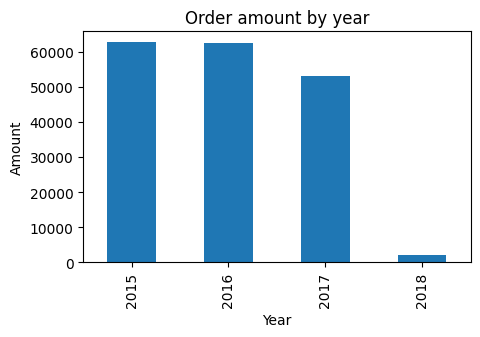

In [23]:
# bar chart for order_year
plt.figure(figsize=(5,3))
df['order_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Order amount by year")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.show()

In [24]:
# frequency count in order_quater
df['order_quarter'].value_counts()

order_quarter
1    48426
3    47323
2    46550
4    38209
Name: count, dtype: int64

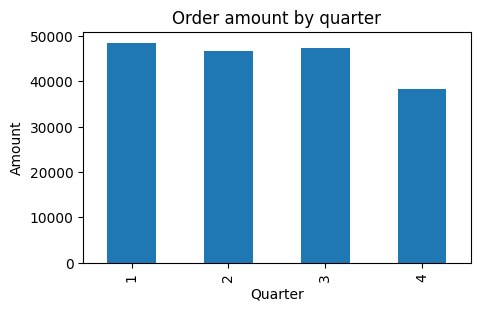

In [25]:
# bar chart for order_quarter
plt.figure(figsize=(5,3))
df['order_quarter'].value_counts().sort_index().plot(kind='bar')
plt.title("Order amount by quarter")
plt.xlabel("Quarter")
plt.ylabel("Amount")
plt.show()

In [26]:
# frequency count in order_month
df['order_month'].value_counts()

order_month
1     17978
5     15976
7     15922
3     15919
8     15912
9     15489
4     15435
6     15139
2     14529
10    12953
12    12759
11    12497
Name: count, dtype: int64

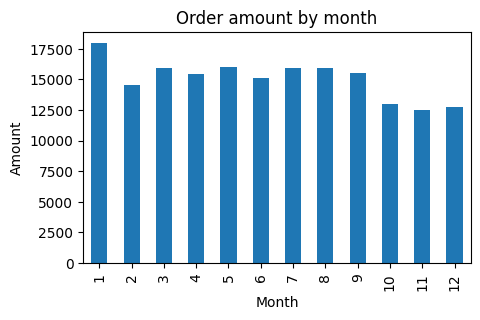

In [27]:
# bar chart for order_month
plt.figure(figsize=(5,3))
df['order_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Order amount by month")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()

In [28]:
# frequency count in order_day_name
df['order_day_name'].value_counts()

order_day_name
Sunday       25945
Friday       25925
Saturday     25900
Monday       25786
Thursday     25748
Tuesday      25619
Wednesday    25585
Name: count, dtype: int64

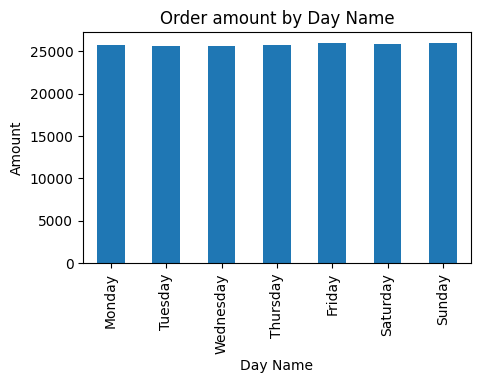

In [29]:
# bar chart for order_day_name
plt.figure(figsize=(5,3))
df['order_day_name'].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind='bar')
plt.title("Order amount by Day Name")
plt.xlabel("Day Name")
plt.ylabel("Amount")
plt.show()

In [30]:
# frequency count in order_hour
df['order_hour'].value_counts()

order_hour
4     7719
10    7697
5     7591
0     7589
13    7578
2     7574
23    7573
17    7573
1     7558
14    7555
19    7552
18    7533
7     7517
9     7505
16    7500
11    7497
12    7486
20    7480
15    7471
3     7440
8     7434
22    7418
21    7398
6     7270
Name: count, dtype: int64

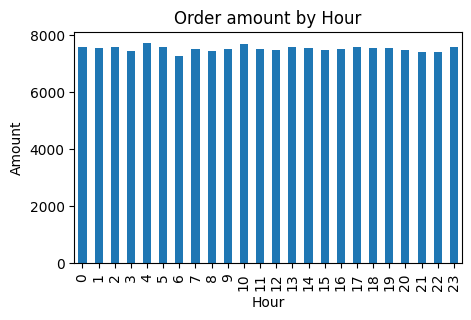

In [31]:
# bar chart for order_hour
plt.figure(figsize=(5,3))
df['order_hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Order amount by Hour")
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.show()

In [32]:
# → The order distributions across different quarters, months, days, and hours appear quite similar. 
# This suggests that the dataset may not reflect real-world seasonality or time-based trends, 
# but rather is a balanced sample created for study purposes.

#### 4.3. Shipping Info

##### Frequency Distribution Analysis

In [33]:
# frequency count with shipping_mode
shipping_mode_count = df['shipping_mode'].value_counts()

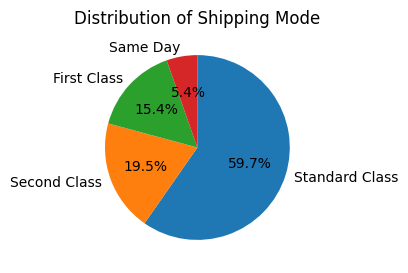

In [34]:
# pie chart for shipping_mode

plt.figure(figsize=(3,3))
plt.pie(
    shipping_mode_count, 
    labels=shipping_mode_count.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    counterclock=False
)
plt.title("Distribution of Shipping Mode")
plt.show()

In [35]:
# frequency count with delivery_status
delivery_status_count = df['delivery_status'].value_counts()

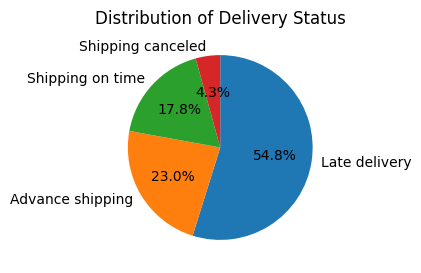

In [36]:
# pie chart for delivery_status
plt.figure(figsize = (3,3))
plt.pie(
    delivery_status_count,
    labels = delivery_status_count.index,
    autopct = '%1.1f%%',
    startangle = 90,
    counterclock = False
)
plt.title('Distribution of Delivery Status')
plt.show()    

In [37]:
# frequency count for late_delivery_risk: 1-late; 0-not late
df['late_delivery_risk'].value_counts()

late_delivery_risk
1    98972
0    81536
Name: count, dtype: int64

#### 4.4. Product Info

In [38]:
# frequency count with product_name
product_count = df['product_name'].value_counts()

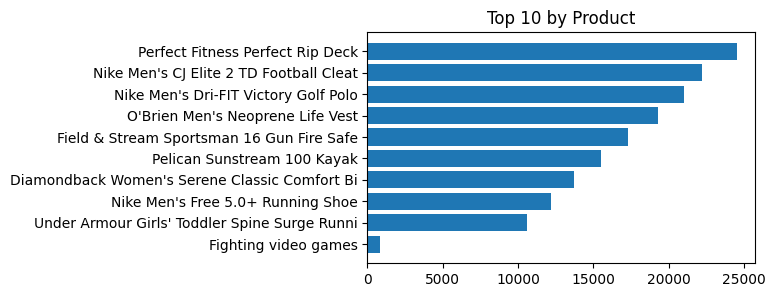

In [39]:
# top product

top_10_product = product_count.sort_values(ascending=False).head(10)

plt.figure(figsize = (5,3))
plt.barh(top_10_product.index, top_10_product)
plt.title('Top 10 by Product')
plt.gca().invert_yaxis()
plt.show()

In [40]:
# frequency count product by category
product_count_by_category = df.groupby('category_name')['product_name'].count() # this is quite a nonsense =D
df.groupby('category_name')['product_name'].unique()

category_name
Accessories             [Team Golf Pittsburgh Steelers Putter Grip, Te...
As Seen on  TV!                 [Nike Men's Free TR 5.0 TB Training Shoe]
Baby                                                       [Baby sweater]
Baseball & Softball     [adidas Men's F10 Messi TRX FG Soccer Cleat, a...
Basketball              [SOLE E25 Elliptical, Diamondback Boys' Insigh...
Books                                                     [Sports Books ]
Boxing & MMA            [Under Armour Women's Micro G Skulpt Running S...
CDs                                                         [CDs of rock]
Cameras                                                      [Web Camera]
Camping & Hiking          [Diamondback Women's Serene Classic Comfort Bi]
Cardio Equipment        [Nike Men's Free 5.0+ Running Shoe, Nike Women...
Children's Clothing                                  [Children's heaters]
Cleats                  [Perfect Fitness Perfect Rip Deck, Total Gym 1...
Computers               

In [41]:
df.groupby('category_name')['product_name'].nunique() # this shows how many products each category includes

category_name
Accessories              6
As Seen on  TV!          1
Baby                     1
Baseball & Softball      3
Basketball               3
Books                    1
Boxing & MMA             3
CDs                      1
Cameras                  1
Camping & Hiking         1
Cardio Equipment         2
Children's Clothing      1
Cleats                   2
Computers                1
Consumer Electronics     1
Crafts                   1
DVDs                     1
Electronics             11
Fishing                  1
Fitness Accessories      2
Garden                   1
Girls' Apparel           4
Golf Apparel             3
Golf Bags & Carts        1
Golf Balls               5
Golf Gloves              7
Golf Shoes               4
Health and Beauty        1
Hockey                   3
Hunting & Shooting       3
Indoor/Outdoor Games     1
Kids' Golf Clubs         8
Lacrosse                 2
Men's Clothing           1
Men's Footwear           1
Men's Golf Clubs         4
Music         

In [42]:
df['category_name'].value_counts() # this shows how many products that were sold in each category

category_name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               837
Children's Clothing       649
Women's Clothing          648
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
DVDs                      483
Crafts                    481
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      429
Boxing & MMA              

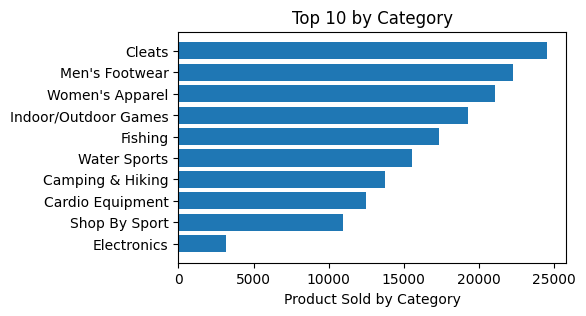

In [43]:
# top category

top_10_category = product_count_by_category.sort_values(ascending=False).head(10)


plt.figure(figsize = (5,3))
plt.barh(top_10_category.index, top_10_category)
plt.xlabel('Product Sold by Category')
plt.title('Top 10 by Category')
plt.gca().invert_yaxis()
plt.show()

### 5. Outliner Analysis

In [44]:
# drop unnecessary columns
df = df.drop(['sales_per_customer', 'benefit_per_order', 'product_price'], axis = 1, errors = 'ignore')

In [60]:
numeric_columns = df[['order_item_profit_ratio', 
                      'order_item_discount_rate', 
                      'order_item_quantity', 
                      'order_item_product_price', 
                      'order_item_total',
                     'days_for_shipping_real',
                     'days_for_shipment_scheduled']]

numeric_columns.describe()

,order_item_profit_ratio,order_item_discount_rate,order_item_quantity,order_item_product_price,order_item_total,days_for_shipping_real,days_for_shipment_scheduled
count,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000,180508.000000
mean,0.120639,0.101668,2.127706,141.222139,183.101751,3.497673,2.931837
std,0.466806,0.070416,1.453469,139.726960,120.041578,1.623743,1.374457
min,-2.750000,0.000000,1.000000,9.990000,7.490000,0.000000,0.000000
25%,0.080000,0.040000,1.000000,50.000000,104.379997,2.000000,2.000000
50%,0.270000,0.100000,1.000000,59.990002,163.990005,3.000000,4.000000
75%,0.360000,0.160000,3.000000,199.990005,247.399994,5.000000,4.000000
max,0.500000,0.250000,5.000000,1999.989990,1939.989990,6.000000,4.000000


In [62]:
# Outliner detection for order_item_profit_ratio
df['order_item_profit_ratio'].describe()

count    180508.000000
mean          0.120639
std           0.466806
min          -2.750000
25%           0.080000
50%           0.270000
75%           0.360000
max           0.500000
Name: order_item_profit_ratio, dtype: float64

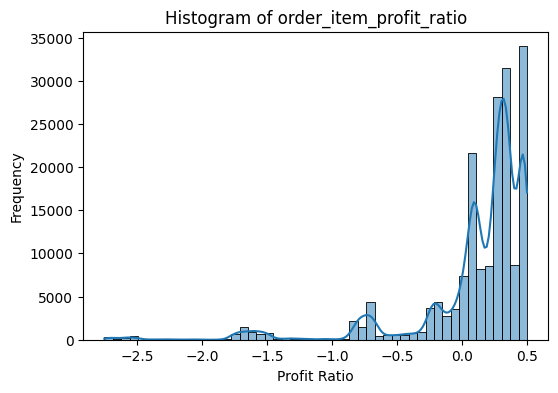

In [64]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['order_item_profit_ratio'], bins=50, kde=True)
plt.title("Histogram of order_item_profit_ratio")
plt.xlabel("Profit Ratio")
plt.ylabel("Frequency")
plt.show()

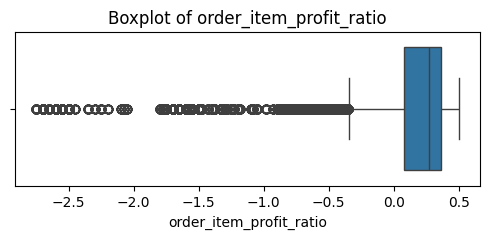

In [65]:
# Boxplot
plt.figure(figsize=(6,2))
sns.boxplot(x=df['order_item_profit_ratio'])
plt.title("Boxplot of order_item_profit_ratio")
plt.show()

In [66]:
# Detect outliers using IQR
Q1 = df['order_item_profit_ratio'].quantile(0.25)
Q3 = df['order_item_profit_ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['order_item_profit_ratio'] < lower_bound) | (df['order_item_profit_ratio'] > upper_bound)]

outlier_count = outliers.shape[0]
total_count = df.shape[0]
outlier_percentage = (outlier_count / total_count) * 100

print(f"Outliers: {outlier_count} / {total_count} ({outlier_percentage:.2f}%)")

Outliers: 17300 / 180508 (9.58%)
